# Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


Resumen estadístico de las variables:
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       

<ipython-input-12-441db526e711>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="viridis")


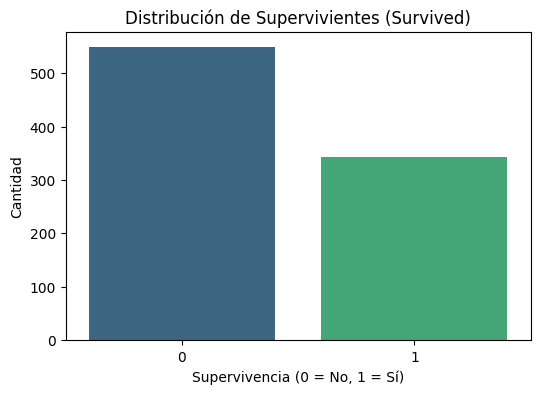

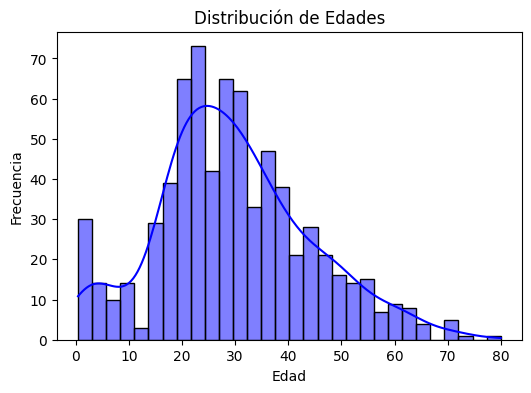

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Cargar los datos
df = pd.read_csv('Titanic-Dataset.csv')

# Resumen estadístico
print("Resumen estadístico de las variables:")
print(df.describe(include="all"))

# Distribución de la variable objetivo "Survived"
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="viridis")
plt.title("Distribución de Supervivientes (Survived)")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)")
plt.ylabel("Cantidad")
plt.show()

# Distribución de la edad
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], kde=True, color="blue", bins=30)
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

## Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [13]:
 #Rellenar valores faltantes (por ejemplo, con la media o moda)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir variables categóricas en variables dummy (one-hot encoding)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar que los valores faltantes hayan sido tratados
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_male         0
Embarked_Q       0
Embarked_S       0
dtype: int64


<ipython-input-13-26edda7d859d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-13-26edda7d859d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# Dividir los Datos en Conjunto de Entrenamiento y Prueba:

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df['Survived']

# Verificar las primeras filas de X e y
print(X.head())
print(y.head())
# Codificar columnas categóricas en X
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns  # Detectar columnas categóricas

for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column].astype(str))

# Verificar la transformación
print(X.head())



# Rellenar los valores nulos
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)  # Aunque y debería tener pocos valores nulos


# Dividir en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_male  Embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500   NaN      True       False   
1  38.0      1      0          PC 17599  71.2833   C85     False       False   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN     False       False   
3  35.0      1      0            113803  53.1000  C123     False       False   
4  35.0      0      0            373450   8.0500   NaN      True       False   

   Embarked_S  
0        True  
1       False  
2       

# Entrenar el Modelo de Regresión Lineal

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar las primeras filas del conjunto escalado
print(X_train_scaled[:5])

model = LogisticRegression(max_iter=1000)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Verificar las primeras predicciones
print(y_pred[:5])

[[-0.45306593 -1.61413602  0.71732642  1.22920747 -0.47072241 -0.47934164
  -1.58638267 -0.07868358 -2.08825118  0.7243102  -0.30335547  0.59248936]
 [ 1.11387354 -0.40055118 -1.43097537 -0.50350514 -0.47072241 -0.47934164
  -0.54683874 -0.37714494  0.44573085  0.7243102  -0.30335547  0.59248936]
 [-0.25427511  0.81303367  1.39328395  0.18957991 -0.47072241 -0.47934164
   1.63720308 -0.47486697  0.44573085  0.7243102  -0.30335547  0.59248936]
 [ 1.00083562  0.81303367 -0.49085053 -0.27247679  0.37992316 -0.47934164
   0.30278851 -0.47623026  0.44573085  0.7243102  -0.30335547  0.59248936]
 [ 1.42570229  0.81303367 -1.66794898 -1.81266577  2.93185988  2.04874166
  -0.02206897 -0.02524937  0.44573085 -1.38062393 -0.30335547  0.59248936]]
[0 0 0 1 1]


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Convertir predicciones continuas en etiquetas binarias (umbral = 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Evaluación del Modelo (Clasificación Binaria):")
print(f"Precisión (Accuracy): {accuracy:.2f}")
print(f"Precisión (Precision): {precision:.2f}")
print(f"Sensibilidad (Recall): {recall:.2f}")
print(f"Puntaje F1 (F1-Score): {f1:.2f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nMatriz de Confusión:")
print(conf_matrix)

# Informe completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_binary))


Evaluación del Modelo (Clasificación Binaria):
Precisión (Accuracy): 0.82
Precisión (Precision): 0.78
Sensibilidad (Recall): 0.77
Puntaje F1 (F1-Score): 0.78

Matriz de Confusión:
[[89 16]
 [17 57]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# New Section